# dataset/review

for CamVid and CamVid-like datasets

In [1]:
import os
from abcli import file
from abcli.modules import objects
from abcli import fullname
from abcli.plugins import cache
from roofAI.semseg.utils import visualize
from roofAI.dataset import RoofAIDataset, MatrixKind
from IPython.display import Image
from abcli import string
from abcli.plugins import seed
import numpy as np

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2382.1-2023-06-aws-batch-a, built on 20 October 2023, 22:36:06


In [2]:
# dataset_alias = "roofAI_ingest_CamVid_v1"
dataset_alias = "roofAI_ingest_AIRS_cache"

In [3]:
dataset_object_name = cache.read(dataset_alias)
subset = "test"
index = 10

RoofAIDataset[DatasetKind.AIRS](roofAI_ingest_AIRS_cache_2023-10-15-15-53-41-09195): 3 subset(s): 95 X test + 857 X train + 94 X val
record_id: christchurch_585
RoofAIDataset[roofAI_ingest_AIRS_cache_2023-10-15-15-53-41-09195].get_filename(test,christchurch_585,MatrixKind.IMAGE): /Users/kamangir/storage/abcli/roofAI_ingest_AIRS_cache_2023-10-15-15-53-41-09195/test/image/christchurch_585.tif
RoofAIDataset.get_matrix(test,christchurch_585,MatrixKind.IMAGE): 10000x10000x3:uint8
RoofAIDataset[roofAI_ingest_AIRS_cache_2023-10-15-15-53-41-09195].get_filename(test,christchurch_585,MatrixKind.MASK): /Users/kamangir/storage/abcli/roofAI_ingest_AIRS_cache_2023-10-15-15-53-41-09195/test/label/christchurch_585.tif
2 unique value(s): [0 1]
RoofAIDataset.get_matrix(test,christchurch_585,MatrixKind.MASK): 10000x10000:uint8
-> /Users/kamangir/storage/abcli/roofAI_ingest_AIRS_cache_2023-10-15-15-53-41-09195/_review/christchurch_585.png


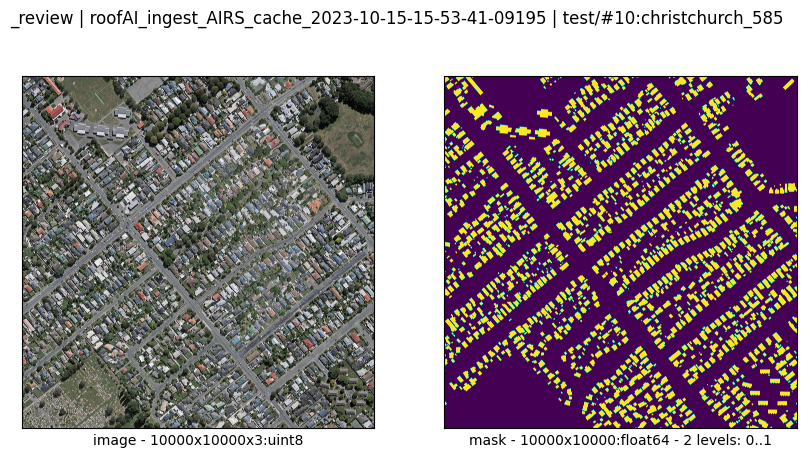

In [4]:
dataset = RoofAIDataset(objects.object_path(dataset_object_name))
dataset.visualize(
        subset=subset,
        index=index,
        in_notebook=True,
        log=True,
    )

In [5]:
seed.log(dataset_object_name)

abcli select roofAI_ingest_AIRS_cache_2023-10-15-15-53-41-09195; open .


In [6]:
# END